<a href="https://colab.research.google.com/github/Cris12Mainz/Topological-Defects/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First.
- We connect the drive.
- We define the files training and validation -> inside each there are two more files: defect and nodefect.
-

In [150]:
# import standard python libraries
import os, urllib, io
from datetime import datetime
import numpy as np

In [151]:
# import the PyTorch deep learning library
import torch, torchvision
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

In [152]:
# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
# import matplotlib, seaborn, and PIL data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [5]:
# import the Google Colab GDrive connector
from google.colab import drive

# mount GDrive inside the Colab notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
 # create data sub-directory
data_dir = '/content/drive/MyDrive/Topological_Defects'
if not os.path.exists(data_dir): os.makedirs(data_dir)

# create models sub-directory inside the Colab Notebooks directory
models_directory = '/content/drive/MyDrive/Topological_Defects/models'
if not os.path.exists(models_directory): os.makedirs(models_directory)

In [ ]:
## Here we create the files "training" and "validation" where inside each of these files
## there are files called "defect" and "neutro"
import os
import glob

#create training dir
training_dir = os.path.join(data_dir,"training")
if not os.path.isdir(training_dir):
  os.mkdir(training_dir)

#create defect in training
defect_training_dir = os.path.join(training_dir,"defect")
if not os.path.isdir(defect_training_dir):
  os.mkdir(defect_training_dir)

#create nodefect in training
neutro_training_dir = os.path.join(training_dir,"neutro")
if not os.path.isdir(neutro_training_dir):
  os.mkdir(neutro_training_dir)

#create validation dir
validation_dir = os.path.join(data_dir,"validation")
if not os.path.isdir(validation_dir):
  os.mkdir(validation_dir)

#create defect in validation
defect_validation_dir = os.path.join(validation_dir,"defect")
if not os.path.isdir(defect_validation_dir):
  os.mkdir(defect_validation_dir)

#create nodefect in validation
neutro_validation_dir = os.path.join(validation_dir,"neutro")
if not os.path.isdir(neutro_validation_dir):
  os.mkdir(neutro_validation_dir)

In [7]:
## Here we create the files "training" and "validation" where inside each of these files
## there are files called "defect" and "neutro"
import os
import glob

#create training dir
training_dir = os.path.join(data_dir,"training")
if not os.path.isdir(training_dir):
  os.mkdir(training_dir)

#create defect in training
#defect_training_dir = os.path.join(training_dir,"defect")
#if not os.path.isdir(defect_training_dir):
#  os.mkdir(defect_training_dir)

#create nodefect in training
#neutro_training_dir = os.path.join(training_dir,"neutro")
#if not os.path.isdir(neutro_training_dir):
#  os.mkdir(neutro_training_dir)

#create validation dir
validation_dir = os.path.join(data_dir,"validation")
if not os.path.isdir(validation_dir):
  os.mkdir(validation_dir)

#create defect in validation
#defect_validation_dir = os.path.join(validation_dir,"defect")
#if not os.path.isdir(defect_validation_dir):
#  os.mkdir(defect_validation_dir)

#create nodefect in validation
#neutro_validation_dir = os.path.join(validation_dir,"neutro")
#if not os.path.isdir(neutro_validation_dir):
#  os.mkdir(neutro_validation_dir)


In [9]:
## Here we have distribuited the data for "training" and for "validation"

#now we have to shuffle the images and divide it between the train and validation
import shutil

split_size = 0.70
nodefect_imgs_size = len(glob.glob("/content/drive/MyDrive/Topological_Defects/data/neutro*"))
defect_imgs_size = len(glob.glob("/content/drive/MyDrive/Topological_Defects/data/defect*"))

for i,img in enumerate(glob.glob("/content/drive/MyDrive/Topological_Defects/data/neutro*")):
  if i < (nodefect_imgs_size*split_size):
    shutil.move(img,training_dir)
  else:
    shutil.move(img,validation_dir)

for i,img in enumerate(glob.glob("/content/drive/MyDrive/Topological_Defects/data/defect*")):
  if i < (defect_imgs_size*split_size):
    shutil.move(img,training_dir)
  else:
    shutil.move(img,validation_dir)

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu').type

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.core.pylabtools import figsize

In [16]:
classes = ['defect', 'neutro']
# labe = 1 -> neutro
# label = 0 -> defect
print(classes[0])
print(classes[1])

defect
neutro


In [110]:
traindir = "/content/drive/MyDrive/Topological_Defects/training"
validir = "/content/drive/MyDrive/Topological_Defects/validation"
transf = torchvision.transforms.Compose([
    torchvision.transforms.Resize((160, 160)), # Resizes images to 160x160
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [51]:
traindir = "/content/drive/MyDrive/Topological_Defects/training"
validir = "/content/drive/MyDrive/Topological_Defects/validation"
transf = torchvision.transforms.Compose([
    torchvision.transforms.Resize((160, 160)), # Resizes images to 160x160
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [111]:
## Transform the ndarray to a tensor!

train_data = torchvision.datasets.ImageFolder(traindir,transform=transf)
test_data = torchvision.datasets.ImageFolder(validir,transform=transf)

In [46]:
print(len(train_data))
print(len(test_data))
print(len(train_data)+len(test_data))

179
72
251


torch.Size([3, 160, 160])


In [19]:
### Pixels of the pictures

img_id = 10

image, label = train_data[img_id] ##

#picture = plt.imread(image)
#print(image.shape) -> ([3,300,300])
#print(type(image)) -> torch.Tensor
## image.shape = ([chanels, height, width])

300 300
Number of pixels: 90000
<class 'torch.Tensor'>


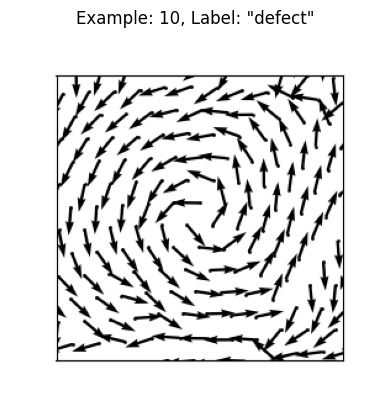

In [20]:
## Let's visualize the picture of 300x300 pixels
# define tensor to image transformation
image_id = 10
image, label = train_data[image_id]

trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: "{}"'.format(str(image_id), str(classes[label])))
plt.axis('off')
test_image_plot = image / 2.0 + 0.5
#test_image_plot = test_image
# plot 10 image sample
plt.imshow(trans(test_image_plot))

# Get the dimensions from the tensor shape
channels, height, width = test_image_plot.shape

# Calculate the number of pixels
num_pixels = height * width
print(height,width)
print(f"Number of pixels: {num_pixels}")
print(type(test_image_plot))

In [ ]:
## Let's change the pixels from (300,300) to (160,160)

In [21]:
# Resize the image tensor using torchvision.transforms.Resize
resize_transform = torchvision.transforms.Resize((160, 160))


##### Resize of the pictures
train_data_resized = []
resize_image = []
#resize_image = []
for i in range(len(train_data)):
  image, label = train_data[i]
  out = resize_transform(image)  #The resize operation on tensor.
  resize_image.append(out) ##
  train_data_resized.append((out, label))

# train_data_resized: the train data that contains imagen (tensor) and label
# resize_image is an ndarray that contains the image part of train_data_resized.
# resize_image has pictures of (3,160,160)

In [54]:
## Let's check the pixels of the new pictures
print(resize_image[0].shape)


torch.Size([3, 160, 160])
<class 'tuple'>


160 160
Number of pixels: 25600
<class 'torch.Tensor'>


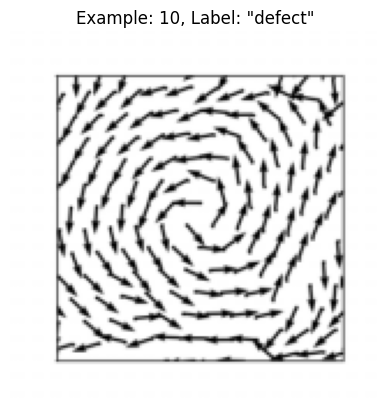

In [23]:
## Let's visualize the new pictures (3,160,160)
## We have plot the same picture and we can obviously
#see the quality has decreased

# define tensor to image transformation
image_id = 10
image, label = train_data_resized[image_id]

trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: "{}"'.format(str(image_id), str(classes[label])))
plt.axis('off')
test_image_plot = image / 2.0 + 0.5
#test_image_plot = test_image
# plot 10 image sample
plt.imshow(trans(test_image_plot))

# Get the dimensions from the tensor shape
channels, height, width = test_image_plot.shape

# Calculate the number of pixels
num_pixels = height * width
print(height,width)
print(f"Number of pixels: {num_pixels}")
print(type(test_image_plot))

We have done the transformation by hand from 300x300 to 160x160

but it is simpler when we define it on the transform() function and then the images are 160x160 for boths -> train and test data

In [135]:
img_id = 10

image, label = train_data[img_id] ##

print(image.shape)

torch.Size([3, 160, 160])


Neural Network Implementation

In [155]:
# implement the CIFAR10Net network architecture
class binary(nn.Module):

    # define the class constructor
    def __init__(self):

        # call super class constructor
        super(binary, self).__init__()

        # specify convolution layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)

        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # specify convolution layer 2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)

        # define max-pooling layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Calculate the correct input features for the linear layer based on 160x160 input images:
        # Input: (3, 160, 160)
        # After conv1: (6, (160-5+0)/1 + 1) = (6, 156, 156)
        # After pool1: (6, 156/2) = (6, 78, 78)
        # After conv2: (16, (78-5+0)/1 + 1) = (16, 74, 74)
        # After pool2: (16, 74/2) = (16, 37, 37)
        # Flattened size: 16 * 37 * 37 = 21904
        self.linear1 = nn.Linear(16 * 37 * 37, 120, bias=True) # Corrected input features to 21904
        self.relu1 = nn.ReLU(inplace=True) # the non-linearity

        # specify fc layer 2 - in 120, out 84
        self.linear2 = nn.Linear(120, 84, bias=True) # the linearity W*x+b
        self.relu2 = nn.ReLU(inplace=True) # the non-linarity

        # specify fc layer 3 - in 84, out 2
        self.linear3 = nn.Linear(84, 2) # the linearity W*x+b

        # add a softmax to the last layer
        self.logsoftmax = nn.LogSoftmax(dim=1) # the softmax

    # define network forward pass
    def forward(self, images):

        # high-level feature learning via convolutional layers

        # define conv layer 1 forward pass
        x = self.pool1(self.relu1(self.conv1(images)))

        # define conv layer 2 forward pass
        x = self.pool2(self.relu2(self.conv2(x)))

        # feature flattening

        # reshape image pixels
        x = x.view(-1, 16 * 37 * 37) # Corrected view operation to 21904

        # combination of feature learning via non-linear layers

        # define fc layer 1 forward pass
        x = self.relu1(self.linear1(x))

        # define fc layer 2 forward pass
        x = self.relu2(self.linear2(x))

        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))

        # return forward pass result
        return x

In [156]:
model = binary()

In [157]:
model = model.to(device)

In [140]:
!nvidia-smi

Tue Nov 18 16:27:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             32W /   70W |     772MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [158]:
# print the initialized architectures
print('[LOG] Binary-Clasification architecture:\n\n{}\n'.format(model))

[LOG] Binary-Clasification architecture:

binary(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=21904, out_features=120, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=84, out_features=2, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)



let's have a look into the number of model parameters that we aim to train in the next steps of the notebook:

In [159]:
# init the number of model parameters
num_params = 0

# iterate over the distinct parameters
for param in model.parameters():

    # collect number of parameters
    num_params += param.numel()

# print the number of model paramters
print('[LOG] Number of to be trained Binary model parameters: {}.'.format(num_params))

[LOG] Number of to be trained Binary model parameters: 2641806.


In [160]:
# define the optimization criterion / loss function
nll_loss = nn.NLLLoss()

In [161]:
nll_loss = nll_loss.to(device)


We will use the Stochastic Gradient Descent (SGD) optimization and set the learning rate to 0.001. With each mini-batch step, the optimizer will update the model parameters according to the degree of classification error (the NLL loss).

In [162]:
# define learning rate and optimization strategy
learning_rate = 0.001
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)

5. Neural Network Model Training


In this section, we will train our neural network model (as implemented in the section above) using the transformed images. Specifically, we will examine the distinct training steps and  how to monitor the training progress.

So far, we have pre-processed the dataset, implemented the CNN, and defined the classification error. Let's now start to train a corresponding model for 20 epochs with a mini-batch size of 23 "defects" images per batch. This implies that the whole dataset will be fed to the CNN 20 times in chunks of 128 images, yielding 7 mini-batches (159 training images / 23 images per mini-batch) per epoch. After processing each mini-batch, the parameters of the network will be updated.

In [163]:
# specify the training parameters
num_epochs = 20 # number of training epochs
mini_batch_size = 23 # size of the mini-batches

Furthermore, let's specify and instantiate a corresponding PyTorch data loader that feeds the image tensors to our neural network:



In [164]:
train_dataloader = torch.utils.data.DataLoader(train_data_resized, batch_size=mini_batch_size, shuffle=True)

5.2. Running the Network Training


Finally, we start training the model. The training procedure for each mini-batch is performed as follows:

1) Do a forward pass through the Binary network

2) Compute the negative log-likelihood classification error

3) Do a backward pass through the Binary network, and

4) Update the parameters of the network
.

We will monitor whether the loss decreases as training progresses to ensure learning while training our CNN model. Therefore, we obtain and evaluate the classification performance of the entire training dataset after each training epoch. Based on this evaluation, we can conclude the training progress and whether the loss is converging (indicating that the model might not improve further).

The following elements of the network training code below should be given particular attention:



*    loss.backward() computes the gradients based on the magnitude of the reconstruction loss,

*   optimizer.step() updates the network parameters based on the gradient.


In [165]:
# init collection of training epoch losses
train_epoch_losses = []

# set the model in training mode
model.train()

# train the CIFAR10 model
for epoch in range(num_epochs):

    # init collection of mini-batch losses
    train_mini_batch_losses = []

    # iterate over all-mini batches
    for i, (images, labels) in enumerate(train_dataloader):

        # push mini-batch data to computation device
        images = images.to(device)
        labels = labels.to(device)

        # run forward pass through the network
        output = model(images)

        # reset graph gradients
        model.zero_grad()

        # determine classification loss
        loss = nll_loss(output, labels)

        # run backward pass
        loss.backward()

        # update network paramaters
        optimizer.step()

        # collect mini-batch reconstruction loss
        train_mini_batch_losses.append(loss.data.item())

    # determine mean min-batch loss of epoch
    train_epoch_loss = np.mean(train_mini_batch_losses)

    # print epoch loss
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))

    # set filename of actual model
    model_name = 'binary_model_epoch_{}.pth'.format(str(epoch))

    # save current model to GDrive models directory
    torch.save(model.state_dict(), os.path.join(models_directory, model_name))

    # determine mean min-batch loss of epoch
    train_epoch_losses.append(train_epoch_loss)

/tmp/ipython-input-2628001669.py:42: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")


[LOG 20251118-16:28:56] epoch: 0 train-loss: 0.6938831359148026
[LOG 20251118-16:28:56] epoch: 1 train-loss: 0.6931317299604416
[LOG 20251118-16:28:57] epoch: 2 train-loss: 0.6926143169403076
[LOG 20251118-16:28:57] epoch: 3 train-loss: 0.6914499327540398
[LOG 20251118-16:28:57] epoch: 4 train-loss: 0.6904360055923462
[LOG 20251118-16:28:57] epoch: 5 train-loss: 0.6902847960591316
[LOG 20251118-16:28:57] epoch: 6 train-loss: 0.6890735104680061
[LOG 20251118-16:28:57] epoch: 7 train-loss: 0.6884947419166565
[LOG 20251118-16:28:57] epoch: 8 train-loss: 0.6878344416618347
[LOG 20251118-16:28:57] epoch: 9 train-loss: 0.6874855607748032
[LOG 20251118-16:28:57] epoch: 10 train-loss: 0.6864858493208885
[LOG 20251118-16:28:58] epoch: 11 train-loss: 0.6857478767633438
[LOG 20251118-16:28:58] epoch: 12 train-loss: 0.6853725910186768
[LOG 20251118-16:28:58] epoch: 13 train-loss: 0.6844151094555855
[LOG 20251118-16:28:58] epoch: 14 train-loss: 0.6837380155920982
[LOG 20251118-16:28:58] epoch: 15 t

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1098780211.py:13: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("[Classification Error $\mathcal{L}^{NLL}$]", fontsize=10)


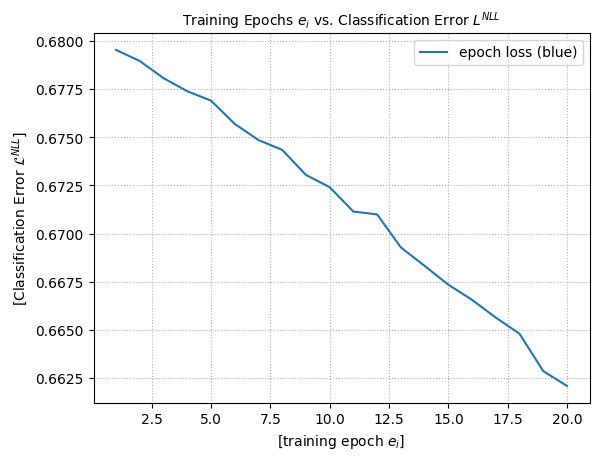

In [167]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot the training epochs vs. the epochs' classification error
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss (blue)')

# add axis legends
ax.set_xlabel("[training epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Classification Error $\mathcal{L}^{NLL}$]", fontsize=10)

# set plot legend
plt.legend(loc="upper right", numpoints=1, fancybox=True)

# add plot title
plt.title('Training Epochs $e_i$ vs. Classification Error $L^{NLL}$', fontsize=10);

it converges on epoch = 20 and the error = 0.8

6. Neural Network Model Evaluation


Before evaluating our model, let's load the best-performing model. Remember that we stored a snapshot of the model after each training epoch to our local model directory. We will now load the last snapshot saved.

In [169]:
# restore pre-trained model snapshot
best_model_name = '/content/drive/MyDrive/Topological_Defects/models/binary_model_epoch_19.pth'

# init pre-trained model class
best_model = binary()

# load pre-trained models directly from the local file path
best_model.load_state_dict(torch.load(best_model_name, map_location=torch.device('cpu')))

<All keys matched successfully>

In [170]:
# set model in evaluation mode
best_model.eval()

binary(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=21904, out_features=120, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=84, out_features=2, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

To evaluate our trained model, we need to feed the "defects" images reserved for evaluation (the images that we didn't use as part of the training process) through the model. Therefore, let's define a corresponding PyTorch data loader that feeds the image tensors to our neural network:

In [171]:
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=10000, shuffle=False)

In [172]:
# init collection of mini-batch losses
eval_mini_batch_losses = []

# iterate over all-mini batches
for i, (images, labels) in enumerate(test_dataloader):

    # run forward pass through the network
    output = best_model(images)

    # determine classification loss
    loss = nll_loss(output, labels)

    # collect mini-batch reconstruction loss
    eval_mini_batch_losses.append(loss.data.item())

# determine mean min-batch loss of epoch
eval_loss = np.mean(eval_mini_batch_losses)

# print epoch loss
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] eval-loss: {}'.format(str(now), str(eval_loss)))

[LOG 20251118-16:30:13] eval-loss: 0.6856736540794373


/tmp/ipython-input-813940374.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")


In [185]:
# set (random) image id
image_id = 6

# retrieve image exhibiting the image id
test_image, test_label = test_data[image_id]

In [186]:
classes[test_label]

'defect'

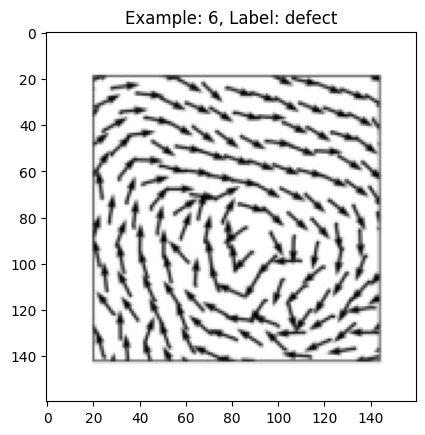

In [187]:
# define tensor to image transformation
trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: {}'.format(str(image_id), str(classes[test_label])))

# un-normalize cifar 10 image sample
test_image_plot = test_image / 2.0 + 0.5

# plot cifar 10 image sample
plt.imshow(trans(test_image_plot))

Now, let's compare the true label with the prediction of our model:

and see what our model predicts

In [188]:
best_model(test_image)

tensor([[-0.6692, -0.7177]], grad_fn=<LogSoftmaxBackward0>)

In [189]:
best_model(test_image.unsqueeze(0))

tensor([[-0.6692, -0.7177]], grad_fn=<LogSoftmaxBackward0>)

In [190]:
classes[torch.argmax(best_model(Variable(test_image.unsqueeze(0))), dim=1).item()]


'defect'

In [192]:
predictions = torch.argmax(best_model(next(iter(test_dataloader))[0]), dim=1)


Overall prediction

In [193]:
metrics.accuracy_score(test_data.targets, predictions.detach())

0.7638888888888888

Finally, let's also inspect the confusion matrix of the model predictions to determine the major sources of misclassification:


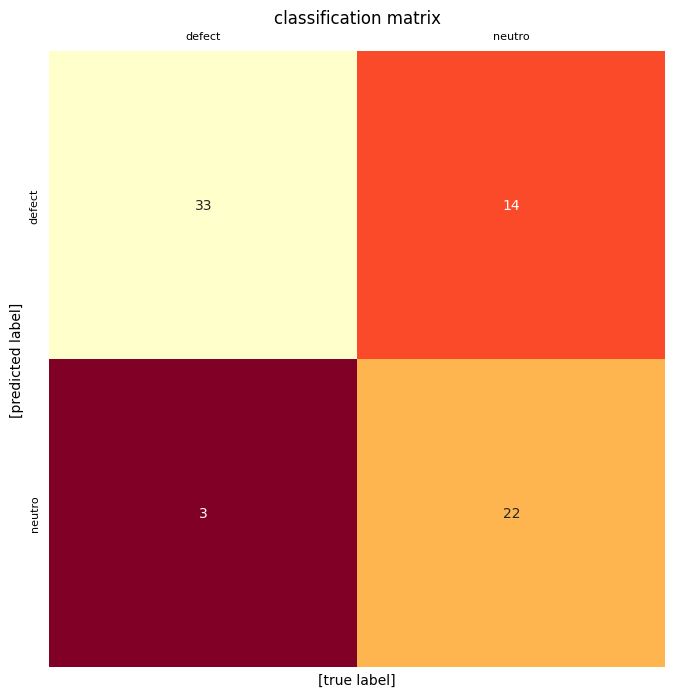

In [194]:

# determine classification matrix of the predicted and target classes
mat = confusion_matrix(test_data.targets, predictions.detach())

# initialize the plot and define size
plt.figure(figsize=(8, 8))

# plot corresponding confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=classes, yticklabels=classes)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# set plot title
plt.title('classification matrix')

# set plot axis lables
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

*   33 defect images were clasified as defects

*   3 defect images were clasified as neutro

*   14 neutro images were clasified as defect

*   22 neutro images were clasified as neutro





